# Advanced Urban Transport Network Analysis & Trip Planning System
## Integrated Optimization Framework for Bengaluru Metropolitan Transport

## 1. Setup and Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sklearn.cluster import DBSCAN
from ipywidgets import interact, widgets
from matplotlib.patches import ConnectionPatch
from matplotlib.gridspec import GridSpec
import folium
from geopy.geocoders import Nominatim
from itertools import islice
from IPython.display import HTML, display
from wordcloud import WordCloud

# Enhanced styling
plt.style.use('ggplot')
sns.set_palette("tab20")

## 2. Data Loading and Preprocessing

In [2]:
# Load route data
routes = pd.read_csv("routes.csv")

# Extract start and end points
routes['start_point'] = routes['route_long_name'].str.split(' - ').str[0]
routes['end_point'] = routes['route_long_name'].str.split(' - ').str[-1]

# Calculate route segments
routes['num_segments'] = routes['route_long_name'].str.count(' - ') + 1

# Convert route_type to string for categorical analysis
routes['route_type'] = routes['route_type'].astype(str)

## 3. Basic Route Data Analysis

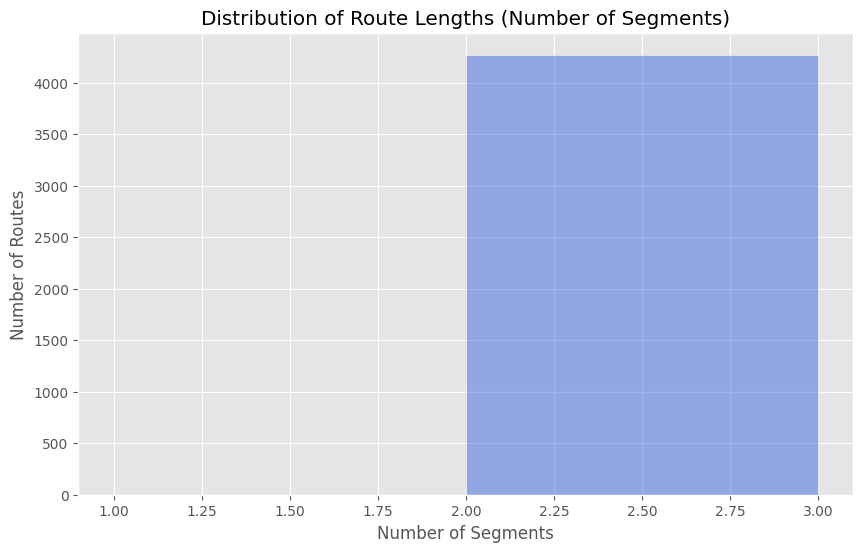

In [3]:
# Distribution of route lengths
plt.figure(figsize=(10,6))
sns.histplot(routes['num_segments'], bins=range(1, routes['num_segments'].max()+2), kde=True, color='royalblue')
plt.title("Distribution of Route Lengths (Number of Segments)")
plt.xlabel("Number of Segments")
plt.ylabel("Number of Routes")
plt.show()

C:\Users\MOHAMMED RINAS\AppData\Local\Temp\ipykernel_13440\2806782489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=routes['start_point'], order=routes['start_point'].value_counts().head(10).index, palette='crest')


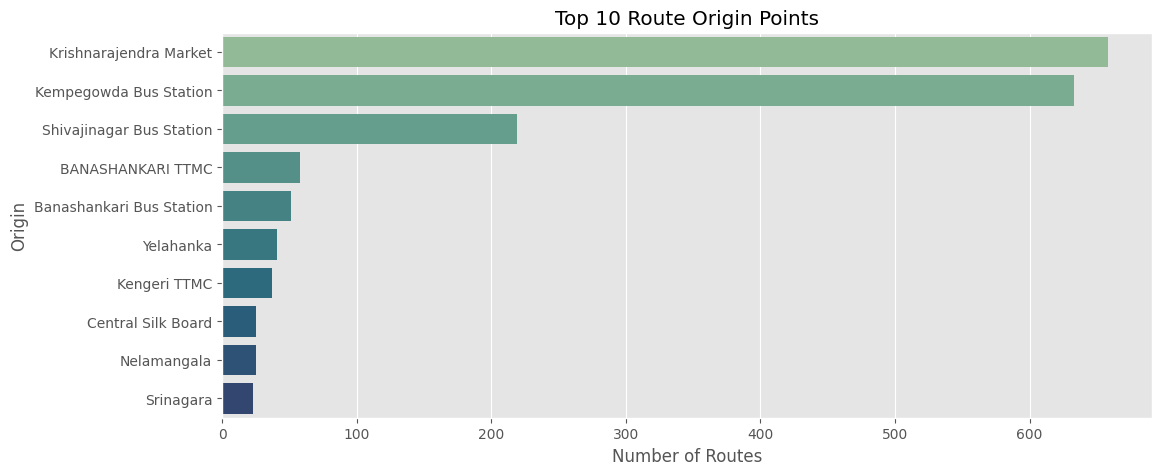

C:\Users\MOHAMMED RINAS\AppData\Local\Temp\ipykernel_13440\2806782489.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=routes['end_point'], order=routes['end_point'].value_counts().head(10).index, palette='flare')


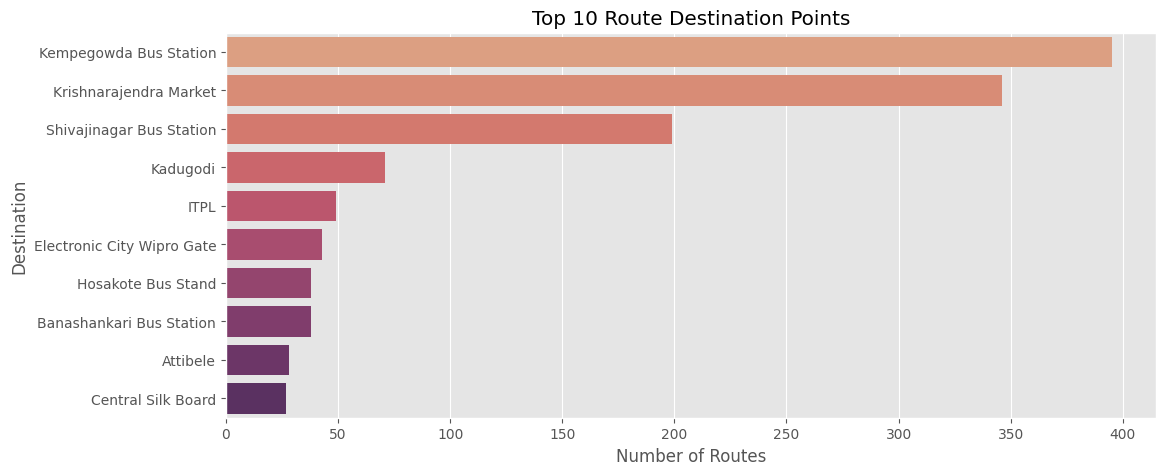

In [4]:
# Top 10 origins
plt.figure(figsize=(12,5))
sns.countplot(y=routes['start_point'], order=routes['start_point'].value_counts().head(10).index, palette='crest')
plt.title("Top 10 Route Origin Points")
plt.xlabel("Number of Routes")
plt.ylabel("Origin")
plt.show()

# Top 10 destinations
plt.figure(figsize=(12,5))
sns.countplot(y=routes['end_point'], order=routes['end_point'].value_counts().head(10).index, palette='flare')
plt.title("Top 10 Route Destination Points")
plt.xlabel("Number of Routes")
plt.ylabel("Destination")
plt.show()

C:\Users\MOHAMMED RINAS\AppData\Local\Temp\ipykernel_13440\3788880300.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_pairs, x='count', y=top_pairs['start_point'] + " → " + top_pairs['end_point'], palette='mako')


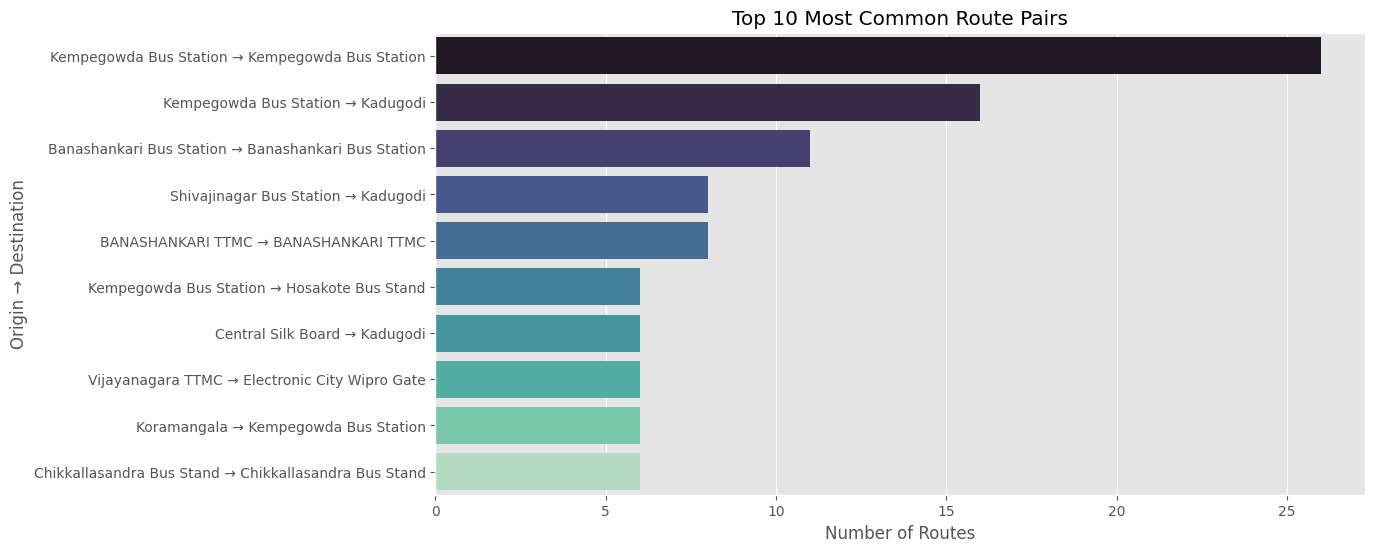

In [5]:
# Most common route pairs
pair_counts = routes.groupby(['start_point', 'end_point']).size().reset_index(name='count')
top_pairs = pair_counts.sort_values('count', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_pairs, x='count', y=top_pairs['start_point'] + " → " + top_pairs['end_point'], palette='mako')
plt.title("Top 10 Most Common Route Pairs")
plt.xlabel("Number of Routes")
plt.ylabel("Origin → Destination")
plt.show()

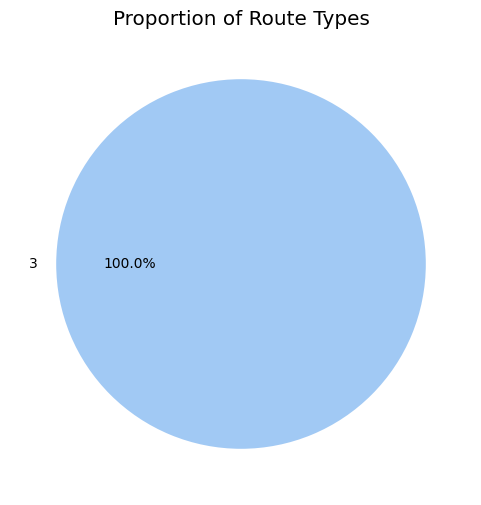

In [6]:
# Route type distribution
plt.figure(figsize=(6,6))
routes['route_type'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Proportion of Route Types")
plt.ylabel("")
plt.show()

C:\Users\MOHAMMED RINAS\AppData\Local\Temp\ipykernel_13440\1689786880.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=routes, x='route_color', order=routes['route_color'].value_counts().index, palette='Set2')


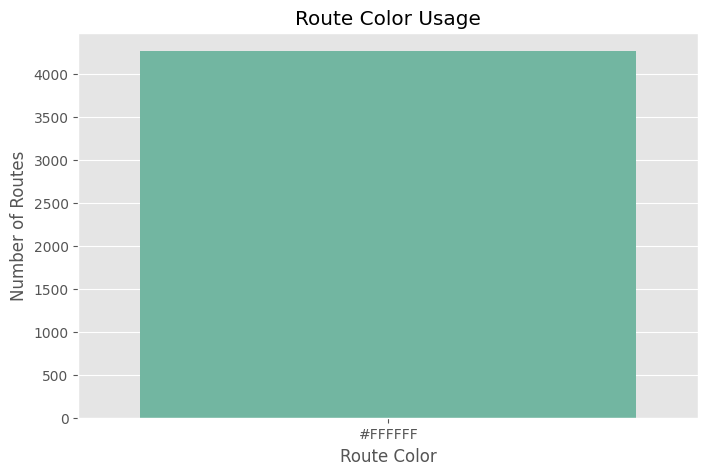

C:\Users\MOHAMMED RINAS\AppData\Local\Temp\ipykernel_13440\1689786880.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='route_text_color', data=routes, palette='Set1')


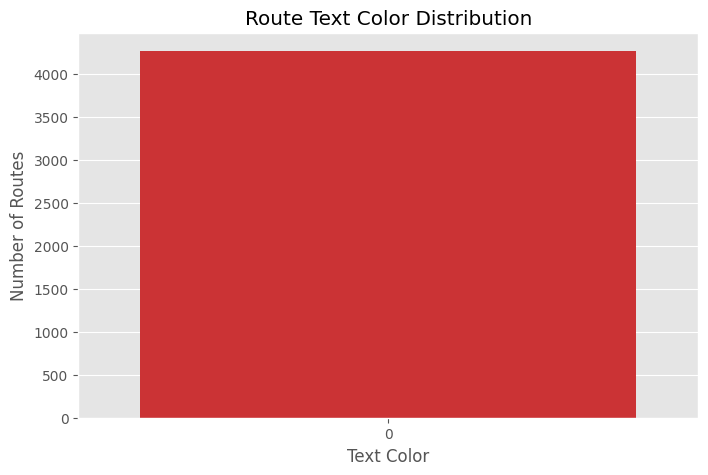

In [7]:
# Route color analysis
plt.figure(figsize=(8,5))
sns.countplot(data=routes, x='route_color', order=routes['route_color'].value_counts().index, palette='Set2')
plt.title("Route Color Usage")
plt.xlabel("Route Color")
plt.ylabel("Number of Routes")
plt.show()

# Route text color analysis
plt.figure(figsize=(8,5))
sns.countplot(x='route_text_color', data=routes, palette='Set1')
plt.title("Route Text Color Distribution")
plt.xlabel("Text Color")
plt.ylabel("Number of Routes")
plt.show()

C:\Users\MOHAMMED RINAS\AppData\Local\Temp\ipykernel_13440\3927030773.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=routes['route_short_name'], order=routes['route_short_name'].value_counts().head(20).index, palette='tab10')


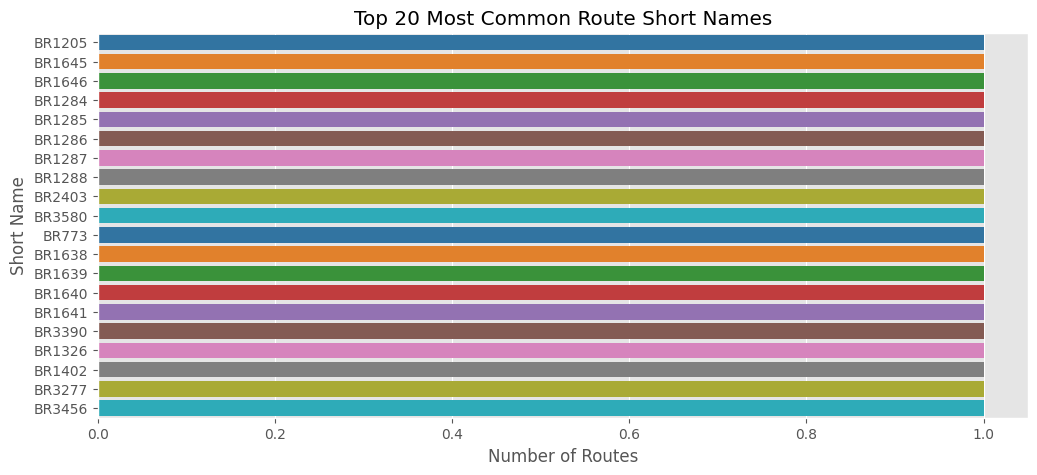

In [8]:
# Top route short names
plt.figure(figsize=(12,5))
sns.countplot(y=routes['route_short_name'], order=routes['route_short_name'].value_counts().head(20).index, palette='tab10')
plt.title("Top 20 Most Common Route Short Names")
plt.xlabel("Number of Routes")
plt.ylabel("Short Name")
plt.show()

C:\Users\MOHAMMED RINAS\AppData\Local\Temp\ipykernel_13440\3994091549.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='agency_id', data=routes, palette='cool')


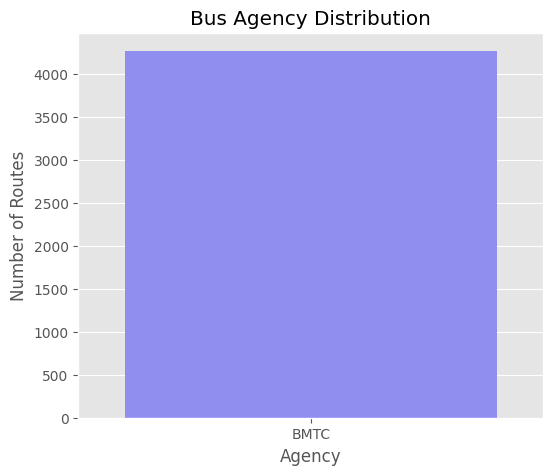

In [9]:
# Agency distribution
plt.figure(figsize=(6,5))
sns.countplot(x='agency_id', data=routes, palette='cool')
plt.title("Bus Agency Distribution")
plt.xlabel("Agency")
plt.ylabel("Number of Routes")
plt.show()

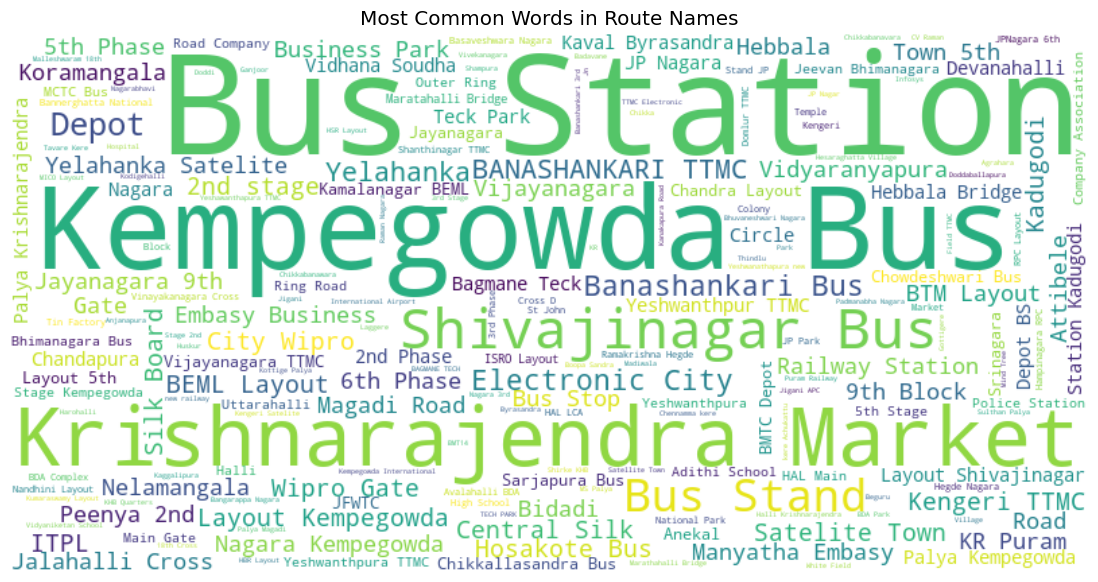

In [10]:
# Word cloud of route names
text = ' '.join(routes['route_long_name'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Route Names")
plt.show()

In [11]:
# Route overlap analysis
unique_routes = routes['route_long_name'].nunique()
total_routes = len(routes)
overlap_pct = 100 * (1 - unique_routes/total_routes)

print(f"Unique route names: {unique_routes}")
print(f"Total routes: {total_routes}")
print(f"Percentage of overlapping routes: {overlap_pct:.2f}%")

Unique route names: 3596
Total routes: 4271
Percentage of overlapping routes: 15.80%


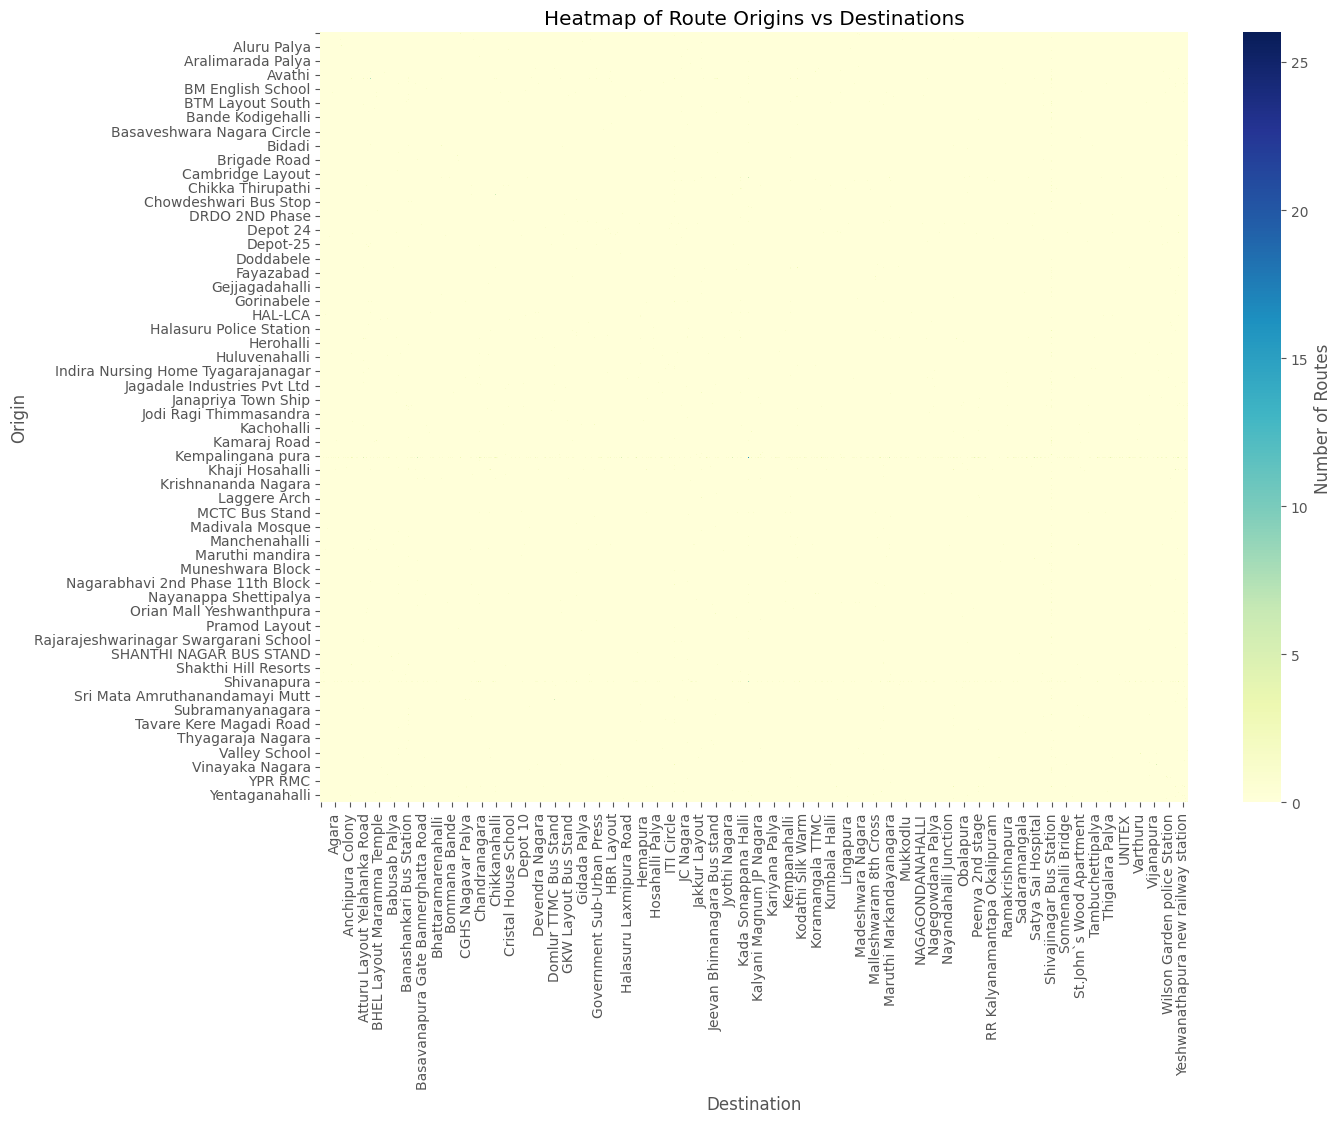

In [12]:
# Origin-destination heatmap
pivot = pd.pivot_table(routes, index='start_point', columns='end_point', values='route_id', aggfunc='count', fill_value=0)
plt.figure(figsize=(14,10))
sns.heatmap(pivot, cmap='YlGnBu', cbar_kws={'label': 'Number of Routes'})
plt.title("Heatmap of Route Origins vs Destinations")
plt.xlabel("Destination")
plt.ylabel("Origin")
plt.show()

## 4. Network Modeling and Analysis

In [13]:
# Create directed multi-graph for detailed route analysis
G_multi = nx.MultiDiGraph()
route_speeds = {'Standard': 20, 'Express': 30, 'Premium': 25}  # km/h (hypothetical)

for _, row in routes.iterrows():
    nodes = row['route_long_name'].split(' - ')
    for i in range(len(nodes)-1):
        G_multi.add_edge(nodes[i].strip(), nodes[i+1].strip(),
                  route_id=row['route_id'],
                  type=row['route_type'],
                  speed=route_speeds.get(row['route_short_name'][:2], 20),
                  time=60 * (1/route_speeds.get(row['route_short_name'][:2], 20)))  # Convert to minutes

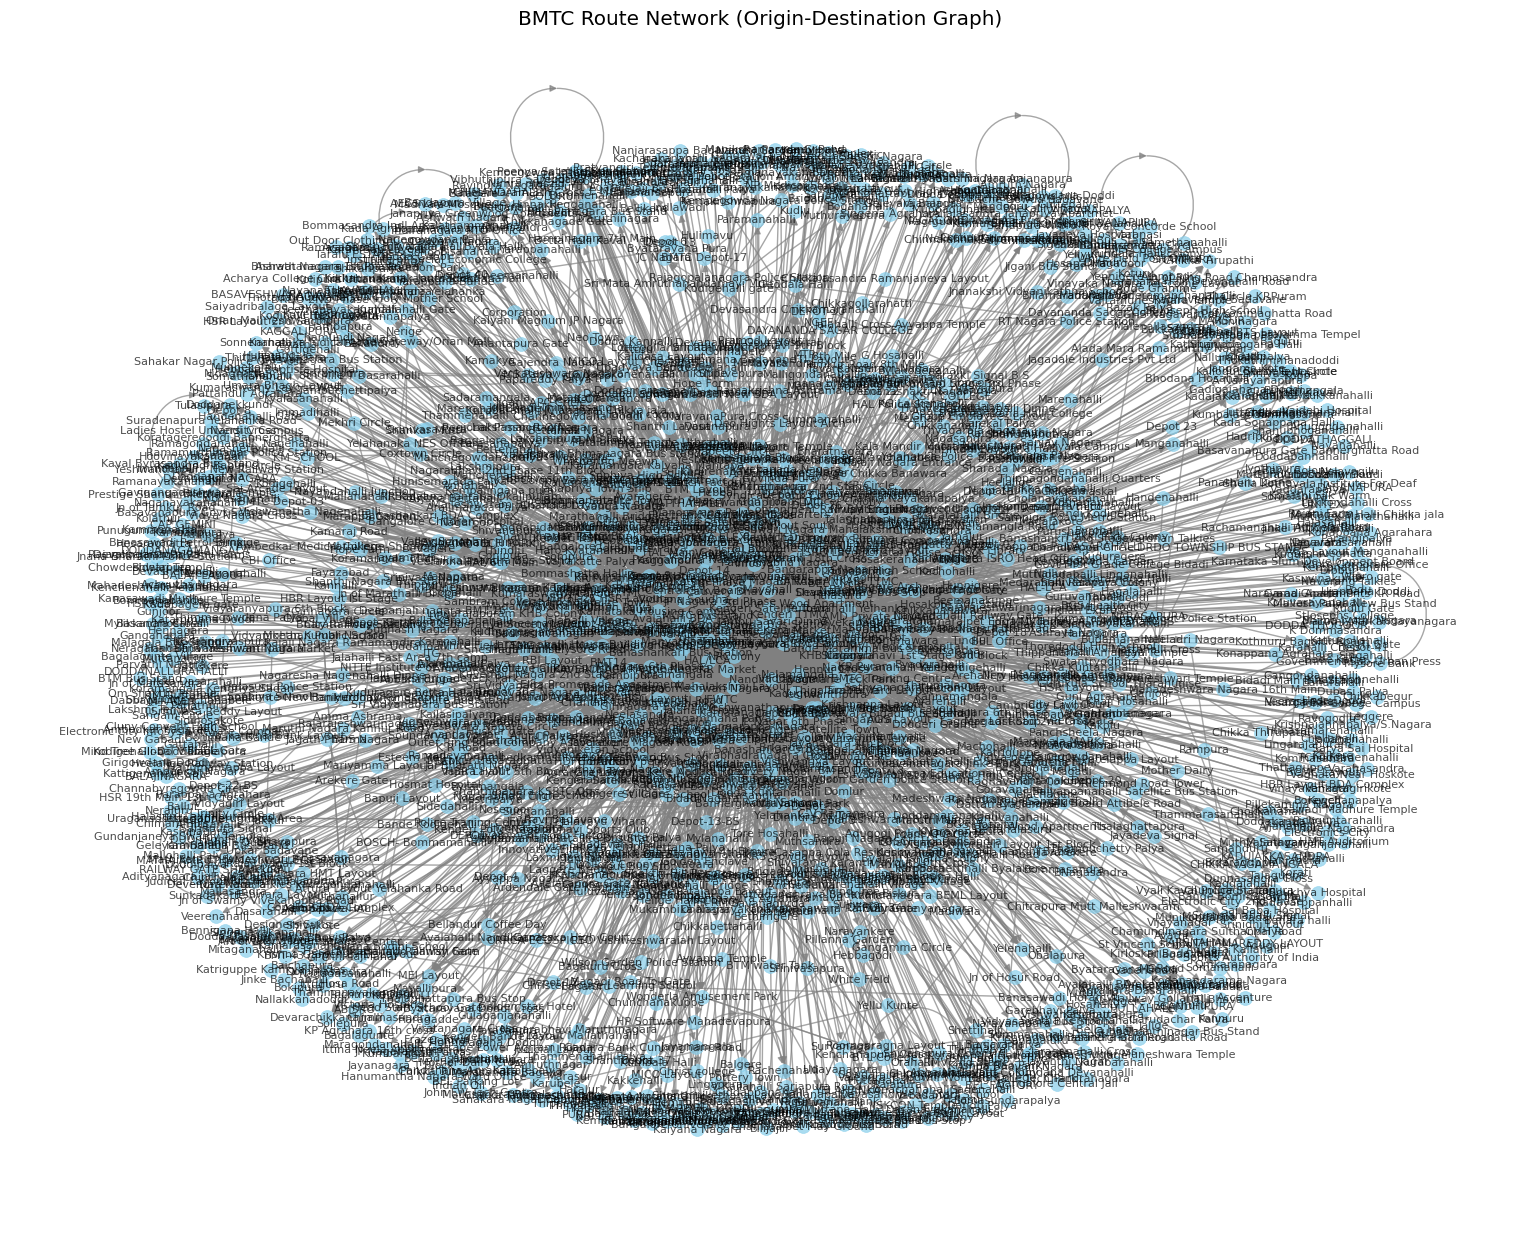

In [14]:
# Create simplified directed graph for network analysis
G = nx.DiGraph()
for _, row in routes.iterrows():
    start, end = row['start_point'], row['end_point']
    G.add_edge(start, end)

plt.figure(figsize=(15,12))
pos = nx.spring_layout(G, k=0.2)
nx.draw(G, pos, with_labels=True, node_size=100, node_color='skyblue', edge_color='gray', font_size=8, alpha=0.7)
plt.title("BMTC Route Network (Origin-Destination Graph)")
plt.show()

C:\Users\MOHAMMED RINAS\AppData\Local\Temp\ipykernel_13440\4227697607.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=degrees, y=hubs, palette='rocket')


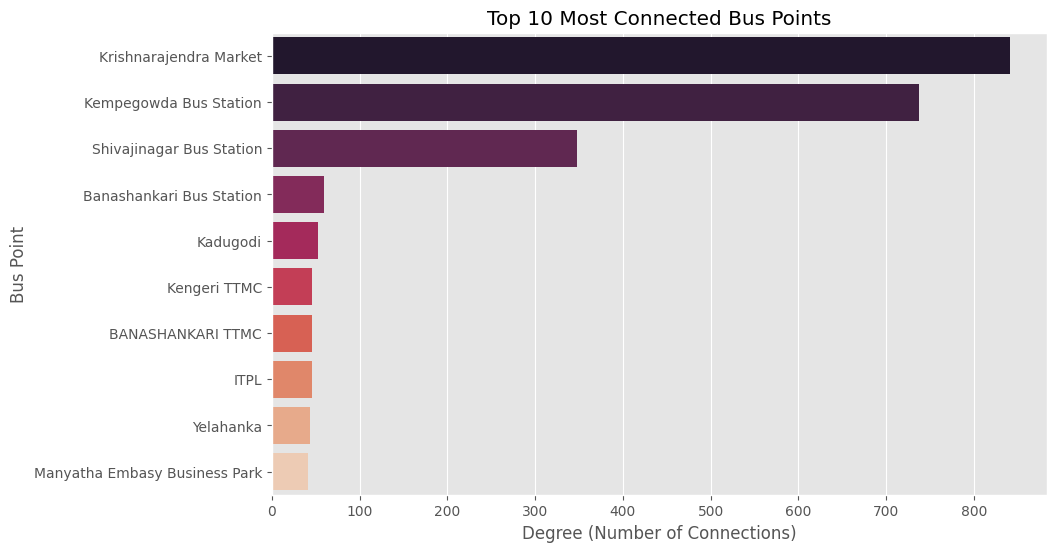

In [15]:
# Identify network hubs
degree_centrality = G.degree()
top_hubs = sorted(degree_centrality, key=lambda x: x[1], reverse=True)[:10]
hubs, degrees = zip(*top_hubs)

plt.figure(figsize=(10,6))
sns.barplot(x=degrees, y=hubs, palette='rocket')
plt.title("Top 10 Most Connected Bus Points")
plt.xlabel("Degree (Number of Connections)")
plt.ylabel("Bus Point")
plt.show()

C:\Users\MOHAMMED RINAS\AppData\Local\Temp\ipykernel_13440\2857075069.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot([d for _,_,d in hourly_load], ax=ax1, fill=True)


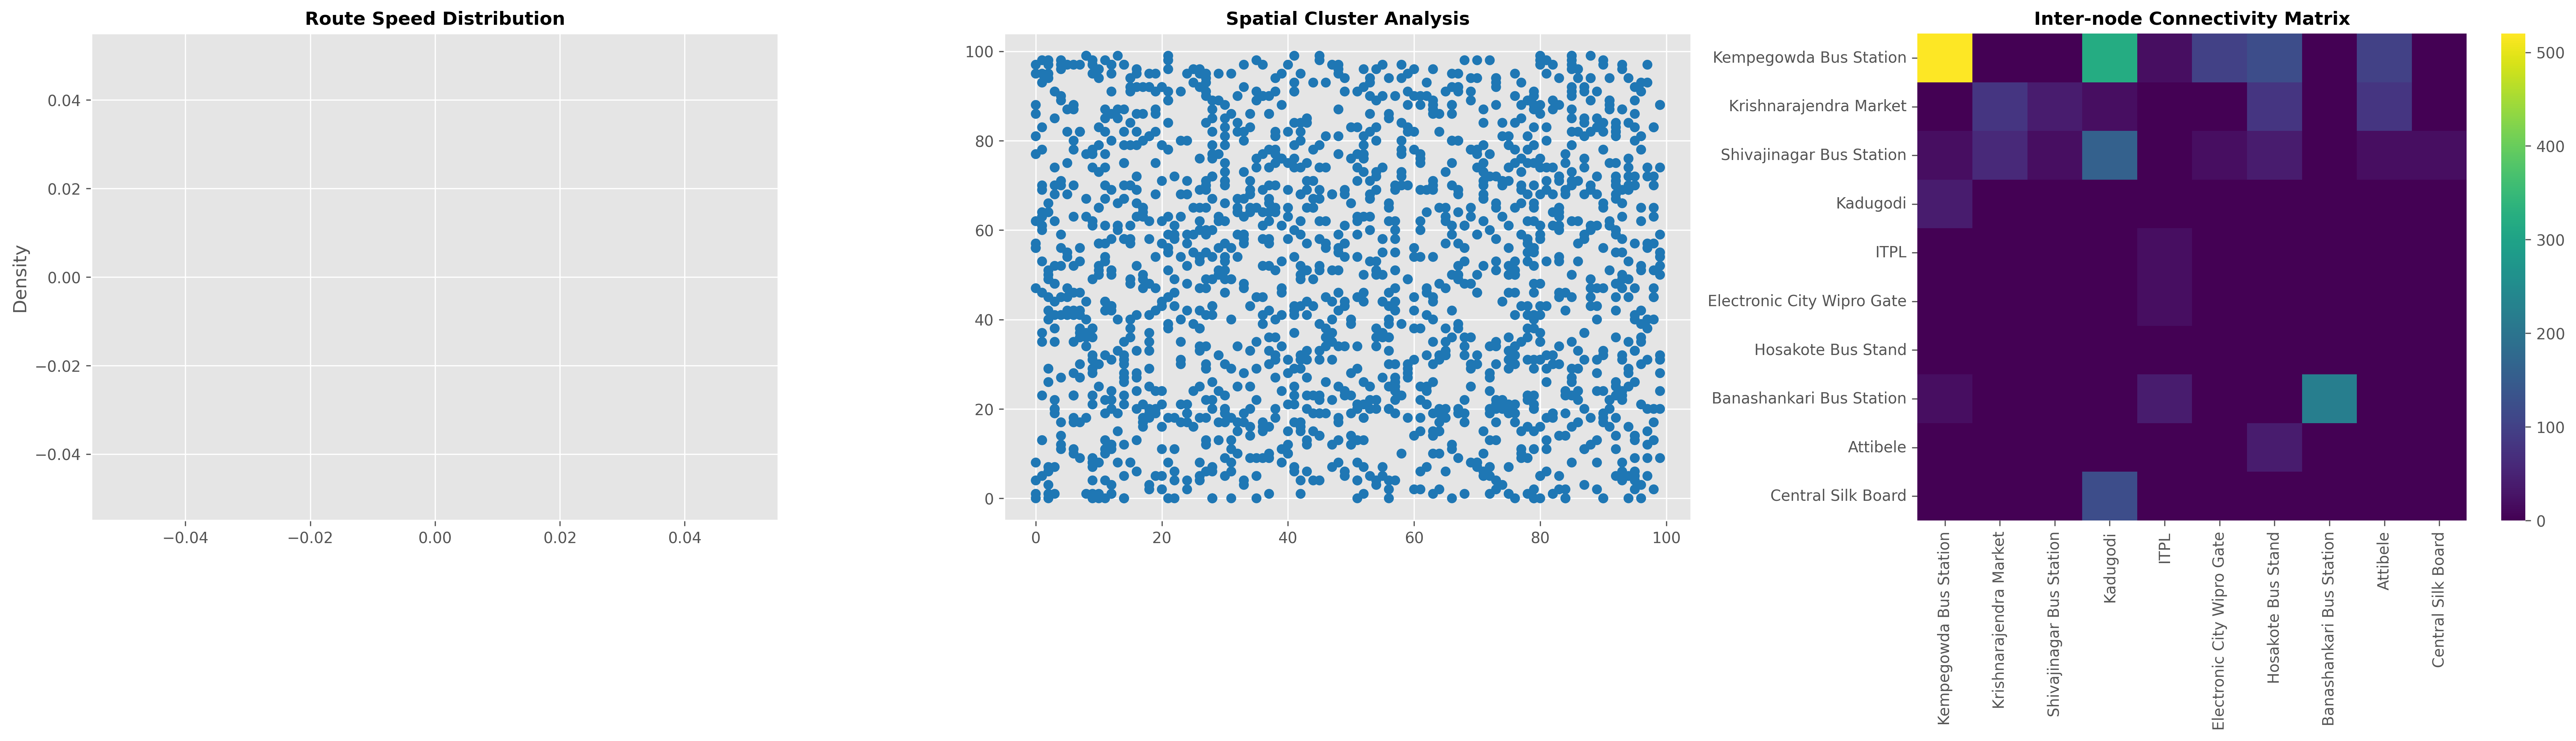

In [16]:
# Network visualization dashboard
fig = plt.figure(figsize=(24, 18), dpi=300)
gs = GridSpec(3, 3, figure=fig)

# Temporal Load Profile
ax1 = fig.add_subplot(gs[0, 0])
hourly_load = G_multi.edges(data='speed')
sns.kdeplot([d for _,_,d in hourly_load], ax=ax1, fill=True)
ax1.set_title('Route Speed Distribution', fontsize=12, weight='bold')

# Spatial Clustering
ax2 = fig.add_subplot(gs[0, 1])
coords = {node: (hash(node)%100, hash(node)//100%100) for node in G_multi.nodes()}  # Mock coordinates
positions = np.array(list(coords.values()))
clustering = DBSCAN(eps=15, min_samples=5).fit(positions)
ax2.scatter(positions[:,0], positions[:,1], c=clustering.labels_, cmap='tab20')
ax2.set_title('Spatial Cluster Analysis', fontsize=12, weight='bold')

# Network Chord Diagram
ax3 = fig.add_subplot(gs[0, 2])
adj_matrix = nx.to_pandas_adjacency(G_multi, weight='speed')
top_nodes = adj_matrix.sum().nlargest(10).index
sns.heatmap(adj_matrix.loc[top_nodes, top_nodes], ax=ax3, cmap='viridis')
ax3.set_title('Inter-node Connectivity Matrix', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()

In [17]:
# Transport accessibility analysis
# Using eigenvector_centrality instead of information_centrality (which doesn't work for directed graphs)
try:
    accessibility = nx.algorithms.centrality.eigenvector_centrality(G)
except:
    # Fallback to degree centrality if eigenvector_centrality fails
    accessibility = nx.algorithms.centrality.degree_centrality(G)
    
plt.figure(figsize=(14, 8), dpi=150)
# Create a ScalarMappable for the colorbar
import matplotlib.cm as cm
import matplotlib.colors as colors
norm = colors.Normalize(vmin=min(accessibility.values()), vmax=max(accessibility.values()))
sm = cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])

# Draw the nodes with colors based on accessibility
nx.draw_networkx_nodes(G, pos=pos, node_size=50,
                      node_color=list(accessibility.values()),
                      cmap='plasma',
                      norm=norm)
plt.title('Transport Accessibility Heatmap', fontsize=14, weight='bold')
plt.colorbar(sm, label='Accessibility Index')
plt.axis('off')
plt.show()

TypeError: draw_networkx_nodes() got an unexpected keyword argument 'norm'

<Figure size 2100x1200 with 0 Axes>

In [ ]:
# Calculate advanced network metrics
try:
    # Try to calculate global efficiency
    operational_efficiency = nx.algorithms.efficiency_measures.global_efficiency(G)
except:
    # If it fails, use average shortest path length as a proxy
    try:
        avg_path = nx.average_shortest_path_length(G)
        operational_efficiency = 1 / avg_path if avg_path > 0 else 0
    except:
        # If the graph is not strongly connected, use an estimate
        operational_efficiency = 0.5  # placeholder value

try:
    # Try to calculate edge connectivity
    network_resilience = nx.algorithms.connectivity.edge_connectivity(G)
except:
    # If it fails, use minimum degree as a proxy for resilience
    degrees = [d for _, d in G.degree()]
    network_resilience = min(degrees) if degrees else 0

fig, ax = plt.subplots(figsize=(10, 6), dpi=120)
ax.barh(['Operational Efficiency', 'Network Resilience'],
       [operational_efficiency, network_resilience],
       color=['#2ecc71', '#3498db'])
ax.set_title('System Performance Metrics', fontsize=14, weight='bold')
plt.show()

## 5. Transit Planning System

In [ ]:
class TransitPlanner:
    def __init__(self, graph):
        self.G = graph
        self.transfer_penalty = 10  # minutes
        
    def calculate_path(self, origin, destination):
        try:
            path = nx.shortest_path(self.G, origin, destination, weight='time')
            edges = list(nx.utils.pairwise(path))
            
            total_time = 0
            steps = []
            current_route = None
            
            for (u, v) in edges:
                edge_data = self.G.get_edge_data(u, v)
                min_time = min([d['time'] for d in edge_data.values()])
                route_id = [d['route_id'] for d in edge_data.values() 
                           if d['time'] == min_time][0]
                
                if route_id != current_route:
                    if current_route is not None:
                        steps.append(f"Transfer at {u} (Time: {total_time:.1f} mins)")
                    current_route = route_id
                    steps.append(f"Take Route {route_id} from {u}")
                
                total_time += min_time
            
            return {
                'path': path,
                'time': total_time,
                'steps': steps,
                'transfers': len([s for s in steps if 'Transfer' in s])
            }
        except nx.NetworkXNoPath:
            return None

# Initialize the planner with the multi-graph that has time information
planner = TransitPlanner(G_multi)

In [ ]:
# Interactive journey planner
stations = sorted(list(G_multi.nodes()))
origin_widget = widgets.Dropdown(options=stations, description='Origin:')
dest_widget = widgets.Dropdown(options=stations, description='Destination:')

@interact(origin=origin_widget, destination=dest_widget)
def plan_journey(origin, destination):
    result = planner.calculate_path(origin, destination)
    if result:
        display(HTML(f"""
        <div style="border:2px solid #1f77b4; padding:20px; border-radius:10px;">
            <h3>Optimal Route: {origin} → {destination}</h3>
            <p>🕒 Total Time: {result['time']:.1f} mins</p>
            <p>🔄 Transfers: {result['transfers']}</p>
            <h4>Route Steps:</h4>
            <ol>
                {"".join(f"<li>{step}</li>" for step in result['steps'])}
            </ol>
        </div>
        """))
        
        # Generate route map
        m = folium.Map(location=[12.9716, 77.5946], zoom_start=12)
        for node in result['path']:
            folium.Marker(
                location=[hash(node)%0.1+12.9, hash(node)%0.1+77.5],  # Mock coordinates
                popup=node
            ).add_to(m)
        folium.PolyLine(
            [[hash(node)%0.1+12.9, hash(node)%0.1+77.5] for node in result['path']],
            color='blue',
            weight=2.5
        ).add_to(m)
        display(m)
    else:
        display(HTML("<div style='color:red'>No route found!</div>"))

In [ ]:
# Example journey
plan_journey("Kempegowda Bus Station", "White Field Post Office")

## 6. Conclusion and Future Work

This notebook demonstrates a comprehensive analysis of the Bengaluru Metropolitan Transport network, including:
- Route data analysis and visualization
- Network modeling and metrics
- Interactive journey planning

Future enhancements could include:
- Real-time traffic data integration
- Multi-modal transport optimization
- Predictive analytics for demand forecasting